my version of answering 2023 exam 1, sam's part and june 2024

EXAM 3 2023

   Ligand Concentration (uM)  %Bound Receptor
0                          0         0.000000
1                          2         0.011752
2                          5         0.086701
3                         10         0.307083
4                         15         0.472566
Estimated parameters:
n = 2.071 with 95% CI: [1.560, 2.583]
Ka = 14.793 with 95% CI: [12.783, 16.803]


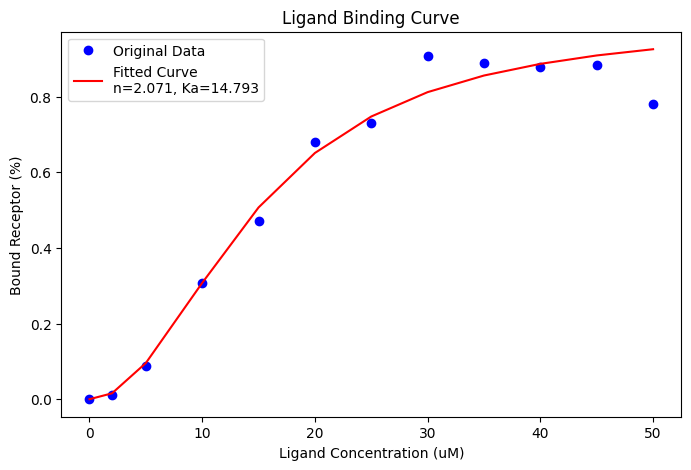

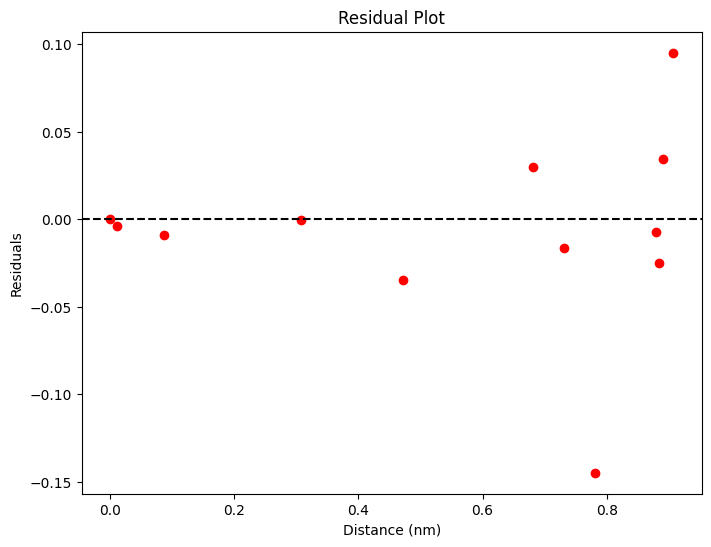

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t

# Load data from the file
file_path = r'C:\Users\maria\OneDrive\Desktop\MM\Data\LigandData.txt'

mydataframe = pd.read_csv(file_path, delimiter='\t')
print(mydataframe.head())  # Displaying the first few rows of the dataframe

#TODO make sure the names of X and Y data are written exactly as it appears
# Extracting data columns
x = mydataframe["Ligand Concentration (uM)"]
y = mydataframe["%Bound Receptor"]

# Define the model function for FRET
def Theta(x, n, Ka):
    return (x**n) / ((Ka**n) + (x**n))

# Fit the model to the data
params, covs = curve_fit(Theta, x, y)

# Extract estimated parameters
n, Ka = params[0], params[1]

# Fit the model to the values
yfit = Theta(x, n, Ka) 


# Calculate confidence intervals
alpha = 0.05  # 95% confidence interval
n_samples = len(x)
dof = max(0, n_samples - len(params))
tval = t.ppf(1.0 - alpha / 2.0, dof)
# Calculate standard errors
try:
    perr = np.sqrt(np.diag(covs))
except Exception as e:
    print(f"Error calculating standard errors: {e}")
    raise

ci_n = tval * perr[0]
ci_Ka = tval * perr[1]

# Print the parameters and their confidence intervals
print(f"Estimated parameters:")
print(f"n = {n:.3f} with 95% CI: [{n - ci_n:.3f}, {n + ci_n:.3f}]")
print(f"Ka = {Ka:.3f} with 95% CI: [{Ka - ci_Ka:.3f}, {Ka + ci_Ka:.3f}]")


# Plotting the data and fitted curve
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'bo', label='Original Data')  # Data points
plt.plot(x, yfit, 'r-', label=f'Fitted Curve\nn={n:.3f}, Ka={Ka:.3f}')  # Fitted curve

# Axis labels and title
plt.xlabel('Ligand Concentration (uM)')
plt.ylabel('Bound Receptor (%)')
plt.title('Ligand Binding Curve')

# Add legend
plt.legend()

# Show plot
plt.show()

#residuals plot
residuals = y - yfit
# Plotting the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y, residuals, color='red')
plt.xlabel('Distance (nm)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()


Exam 1: Present original data + the non linear regression fits on a figrue (FRET vs Distance)

   Distance (nm)  Dye pair1(FRET)
0            0.0         0.881114
1            0.5         0.807579
2            1.0         1.135571
3            1.5         0.964515
4            2.0         1.196868


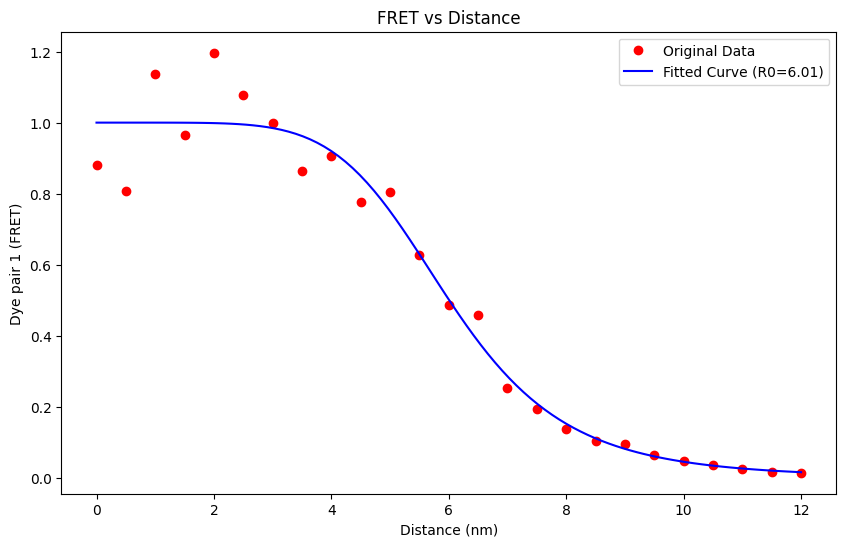

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import curve_fit

#TODO :change the file path and make sure it is ont he desktop 
#TODO : MAKE SURE NO WEIRD EXTRA SPACES IN THE DATA
#TODO : CHANGE MODEL

# Define the model function for FRET
def modelFRET(R, R0):
    return 1 / (1 + (R / R0) ** 6)

# Load data from the file
file_path = r'C:\Users\maria\OneDrive\Desktop\MM\Data\FRETData1.txt'

try:
    mydata = pd.read_csv(file_path, delimiter='\t')
    print(mydata.head())  # Displaying the first few rows of the dataframe

    # Drop unnamed columns
    mydata = mydata.loc[:, ~mydata.columns.str.contains('^Unnamed')]

except FileNotFoundError:
    print("The specified file was not found.")
except PermissionError:
    print("Permission denied. Please check the file permissions.")
except Exception as e:
    print(f"An error occurred: {e}")

#TODO: CHANGE THE VALUES IN THE GIVEN DATA 
# Extracting data columns
R = mydata.iloc[:, 0]
R0 = mydata.iloc[:, 1]


#TODO : CHANGE THE VALUES FOR THE PARAMS 
# Fit the model to the data
initial_guesses = [1.0]  # Initial guesses for parameters, we only need R0 here
params, covs = curve_fit(modelFRET, R, R0, p0=initial_guesses)


# Calculate fitted values
y_fit = modelFRET(R, *params)


# Generate fitted curve
R_range = np.linspace(min(R), max(R), 100)
y_fit_curve = modelFRET(R_range, *params)  # Unpack parameters with *

# Plotting the data and fitted curve
plt.figure(figsize=(10, 6))
plt.plot(R, R0, marker='o', linestyle="", color='red', label='Original Data')
plt.plot(R_range, y_fit_curve, color='blue', label=f'Fitted Curve (R0={params[0]:.2f})')


#TODO: change the axis and title names
# Axis labels and title
plt.xlabel('Distance (nm)')
plt.ylabel('Dye pair 1 (FRET)')
plt.title('FRET vs Distance')

# Add legend
plt.legend()

# Show plot
plt.show()


SSE, SSTO, MSE, MSR, RMSE, Average of Data, Std Dev of Data 

Estimate R0 using the model ^ DONE ALREADY USINNG THE CURVE_FIT FUNCTION AS IT WILL ALREADY ESTIMATE AND GIVE THE VALUE 

In [24]:

# Calculate SSE
SSE = np.sum((R0 - y_fit) ** 2)

# Calculate SSTO
mean_R0 = np.mean(R0)
SSTO = np.sum((R0 - mean_R0) ** 2)

# Calculate SSR
SSR = np.sum((y_fit - mean_R0) ** 2)

# Calculate MSE
MSE = np.mean((R0 - y_fit) ** 2)

# Calculate MSR
MSR = SSR  # Since this is a non-linear regression, df_regression = 1

# Calculate RMSE
RMSE = np.sqrt(MSE)

# Calculate average and standard deviation of the data
average = np.mean(R0)
std_dev = np.std(R0)


print(F"SSE: {SSE:.3f}")
print(F"SSTO: {SSTO:.3f}")
print(F"MSE: {MSE:.3f}")
print(F"SSR: {SSR:.3f}")
print(F"Since it's NLR, dof does not mean anything therefore MSR=SSR: {MSR:.3f}")
print(F"RMSE: {RMSE:.3f}")
print(F"Average of Data: {average:.3f}")
print(F"Stand Dev: {std_dev:3f}")



SSE: 0.143
SSTO: 4.317
MSE: 0.006
SSR: 4.210
Since it's NLR, dof does not mean anything therefore MSR=SSR: 4.210
RMSE: 0.076
Average of Data: 0.519
Stand Dev: 0.415539


RESIDUALS STUFF!!!! Residual plot, Residuals vs Y fit, Correlation, Covariance Matrix, Shapiro Test, QQ plot :)

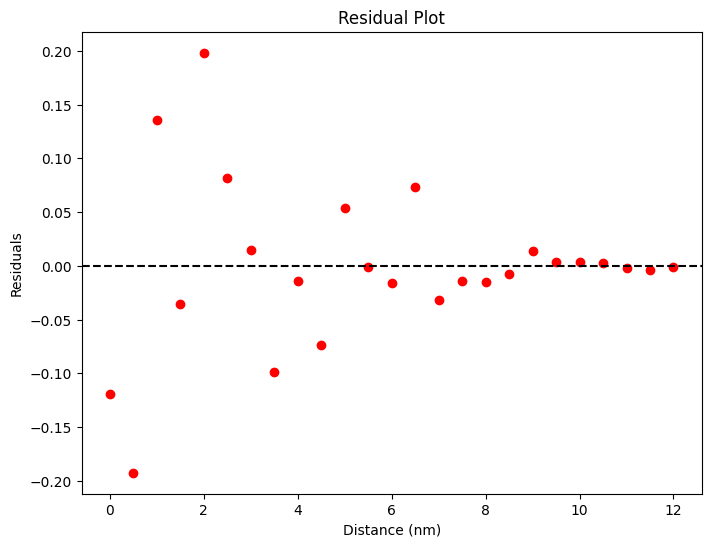

Shapiro-Wilk test: Statistic=0.916, p-value=0.041


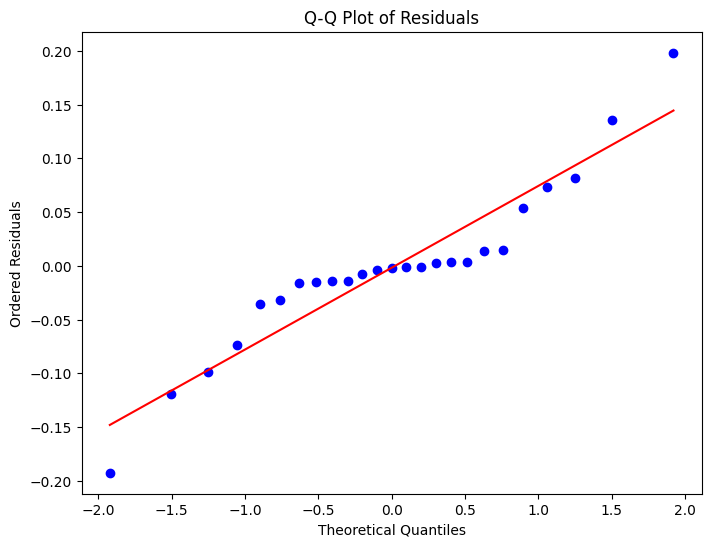

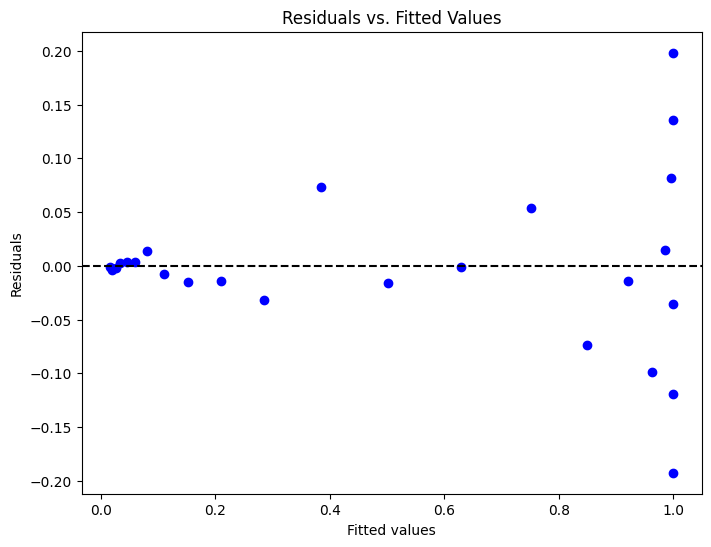

Covariance: -1.462
Correlation: -0.937
Covariance Matrix:
[[ 9.35161203e-04 -1.14509535e-04]
 [-1.14509535e-04  1.90849225e-05]]


In [25]:

import pandas as pd
import numpy as np
from scipy.stats import shapiro, probplot
from scipy.stats import linregress
import matplotlib.pyplot as plt


# calculate residuals 
residuals = R0 - y_fit

# Plotting the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(R, residuals, color='red')
plt.xlabel('Distance (nm)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#Correlation 
# Calculate correlation coefficient
correlation_coef = np.corrcoef(R, R0)[0, 1]


# Shapiro-Wilk test for normality of residuals
#TODO: check the p value, if above 0.05 then data is normally distributed
#todo: frists value is test statistic
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk test: Statistic={stat:.3f}, p-value={p_value:.3f}')

# Q-Q plot of residuals
plt.figure(figsize=(8, 6))
probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.show()

# Plotting residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(y_fit, residuals, color='blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

# Covariance and correlation between R and R0
covariance = np.cov(R, R0)[0, 1]
correlation = np.corrcoef(R, R0)[0, 1]
print(f'Covariance: {covariance:.3f}')
print(f'Correlation: {correlation:.3f}')

# Covariance matrix
X = np.column_stack((np.ones_like(R), R))  # Design matrix
covariance_matrix = np.linalg.inv(X.T @ X) * np.sum(residuals ** 2) / (len(R) - 2)  # Assuming 2 parameters in the model


print("Covariance Matrix:")
print(covariance_matrix)


Exam June 2024, Problem 2

In [26]:
import numpy as np
import pandas as pd
from numpy import array 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from scipy.stats import 

# here we import the data from a saved place locally 
#TODO: change filepath 
file_path = r'C:\Users\maria\OneDrive\Desktop\MM\Data\Helicase.txt'

mydataframe = pd.read_csv(file_path, delimiter='\t')
print(mydataframe)  # Displaying the first few rows of the dataframe
 

   50% GC dNTPs (uM)  Rate (bp/s)  20% GC [dNTPs] (uM)  Rate (bp/s).1
0               0.20         0.46                 6.27           5.31
1               5.01         4.25                 7.45          24.91
2               5.23        10.32                10.05           6.68
3              33.77         8.14                12.50          51.63
4              52.67        20.42                22.18          12.20
5              80.00        31.57                41.87          85.12
6              96.49        37.52                94.25         104.22
7             195.08        50.42               192.49         153.68
8             498.15        96.97               495.76         164.29
9            1002.06       108.27               994.60         169.83


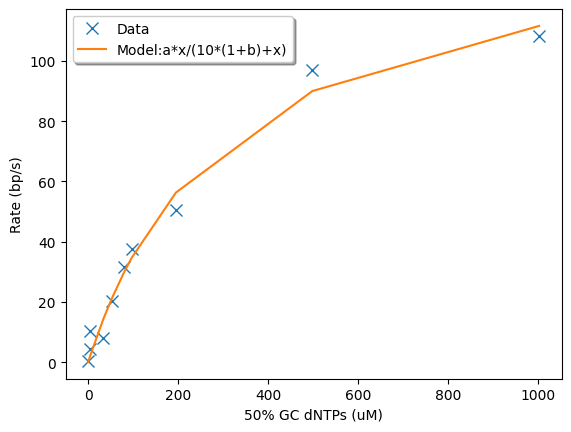

In [27]:
#50% GC data - fit data to model


#TODO make sure the names of X and Y data are written exactly as it appears
# Extracting data columns using iloc: interger location
x = mydataframe.iloc[:,0] 
y = mydataframe.iloc[:,1]

# Define the model function for Rate of DNA unwinding 
def func1(x,a,b): #here we put the variables 
    return (a*x)/(10*(1+b)+x) # simplified the original given model, where a is Kcat, k2 is 10 and k1 is b

# Fit the model to the data
params, covs = curve_fit(func1, x, y)

# Extract estimated parameters based on positioning 
#todo: make sure to write in correct order
a, b = params[0], params[1] 

# Fit the model to the values
yfit = func1(x, a, b)

plt.plot(x,y, linestyle='none' ,marker='x',markerfacecolor='blue' ,markersize=8 ,label='Data')
plt.plot(x,yfit, label='Model:a*x/(10*(1+b)+x)')
plt.xlabel('50% GC dNTPs (uM)')
plt.ylabel('Rate (bp/s)')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show()

In [28]:
#now to determine kcat and 1 values using the given model
#REMEMBER: a=kcat and b=k1
print ('kcat=',a)
print ('k1=',b)

kcat= 146.36025630580346
k1= 30.210171392145195


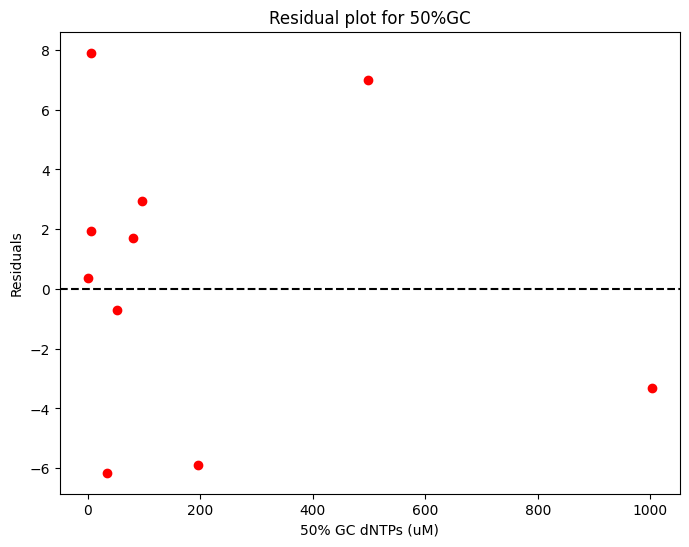

In [29]:
#calculate residuals of the fit and plot (Residuals vs dNTPs[])

# calculate residuals 
residuals = y - yfit #todo change the y values and the fitted
residuals #prints residuals

#residual plot
plt.figure(figsize=(8,6))
plt.scatter(mydataframe.iloc[:,0], residuals, color='red') #todo cahnge iloc of data frame
plt.xlabel('50% GC dNTPs (uM)')
plt.ylabel('Residuals')
plt.title('Residual plot for 50%GC')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()



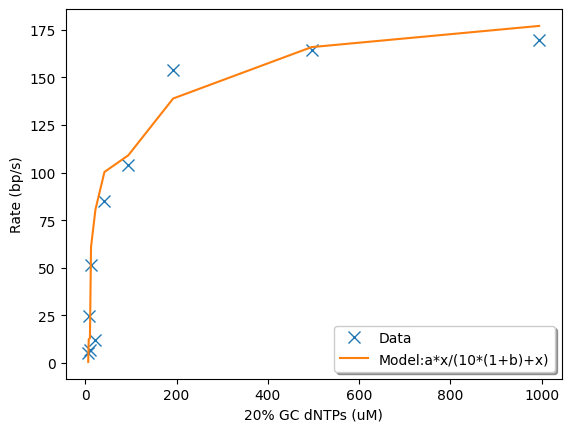

In [30]:
#20% GC data - fit data to model

#TODO make sure the x and y data are appear well and extract by INTERGER LOCATION aka iloc 
# Extracting data columns using iloc: interger location
x2 = mydataframe.iloc[:,2] #TODO change
y2 = mydataframe.iloc[:,3] #TODO change

# Define the model function for Rate of DNA unwinding 
def func2(x,d,e): #here we put the variables #TODO change
    return (d*x)/(10*(1+e)+x) # simplified the original given model, where a is Kcat, k2 is 10 and k1 is b

# Fit the model to the data
params, covs = curve_fit(func1, x2, y2)#TODO change

# Extract estimated parameters based on positioning 
#todo: make sure to write in correct order
d, e = params[0], params[1] #TODO change

# Fit the model to the values
yfit2 = func2(x, d, e)#TODO change

plt.plot(x2,y2, linestyle='none' ,marker='x',markerfacecolor='blue' ,markersize=8 ,label='Data')#TODO change
plt.plot(x2,yfit2, label='Model:a*x/(10*(1+b)+x)')#TODO change
plt.xlabel('20% GC dNTPs (uM)')#TODO change
plt.ylabel('Rate (bp/s)')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show()

In [31]:
#now to determine kcat and 1 values using the given model
#REMEMBER: d=kcat and e=k1
print ('kcat=',d)
print ('k1=',e)

kcat= 189.62469780867127
k1= 6.122417216007388


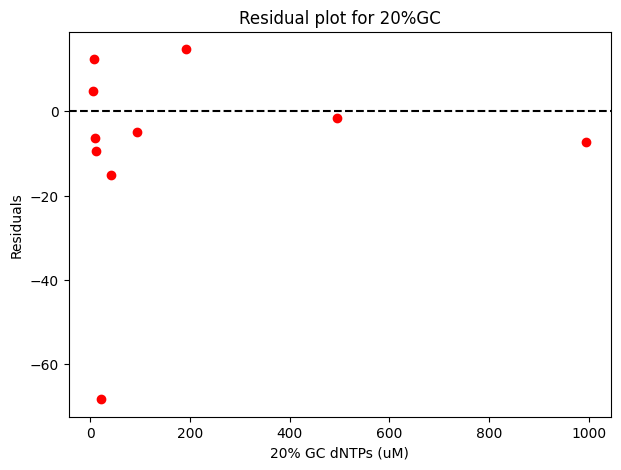

In [32]:
#calculate residuals of the fit and plot (Residuals vs dNTPs[])

# calculate residuals 
residuals2 = y2 - yfit2 #todo change the y values and the fitted
residuals2 #prints residuals

#residual plot
plt.figure(figsize=(7,5))
plt.scatter(mydataframe.iloc[:,2], residuals2, color='red') #todo cahnge iloc of data frame and residuals 
plt.xlabel('20% GC dNTPs (uM)')
plt.ylabel('Residuals')
plt.title('Residual plot for 20%GC')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()
